<a href="https://colab.research.google.com/github/ArifAygun/Machine-Learning-with-Python-Decision-Trees/blob/main/AA__linked_02b_decesion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

##**1. Collect the Data**

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
from numpy import logical_and
#import pandas as pd
#loan = pd.read_csv("loan.csv")
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('loan.csv')
loan = pd.read_csv(file_path)
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


##**2. Explore the Data**

In [101]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [102]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [103]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

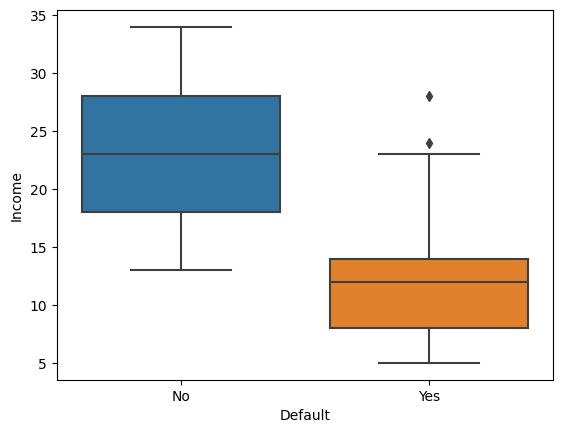

In [104]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

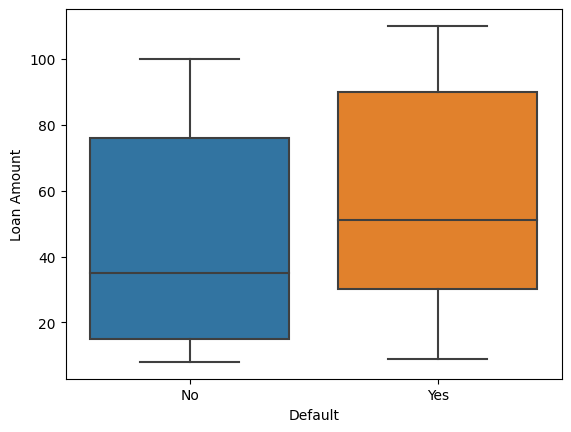

In [105]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

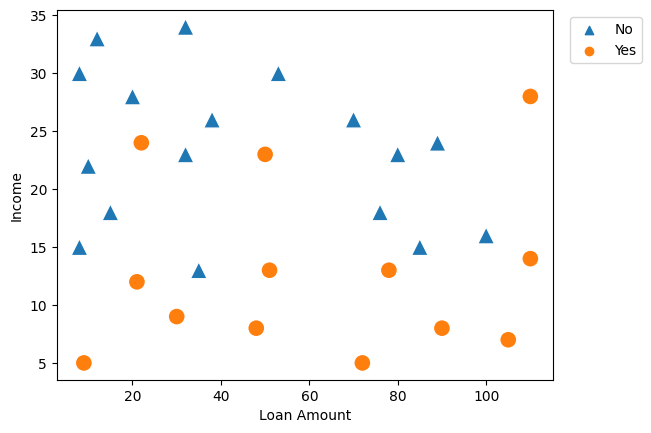

In [106]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## **3. Prepare the Data**

In [107]:
X = [['Income', 'Loan Amount']]

In [108]:
y = loan[['Default']]

In [109]:
X = loan[['Income', 'Loan Amount']].values
y = loan['Default'].values


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [111]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [113]:
model = classifier.fit(X_train, y_train)

In [114]:
model.score(X_test, y_test)

0.5

- A classification tree is only able to accurately explain 50% of the relationship between the independent variables and a dependent variable within the test data.
- That is no better than a coin toss.
- We can do better!

## 5. Visualize the Classification Tree

In [115]:
X = pd.DataFrame(X, columns=['Income', 'Loan Amount'])

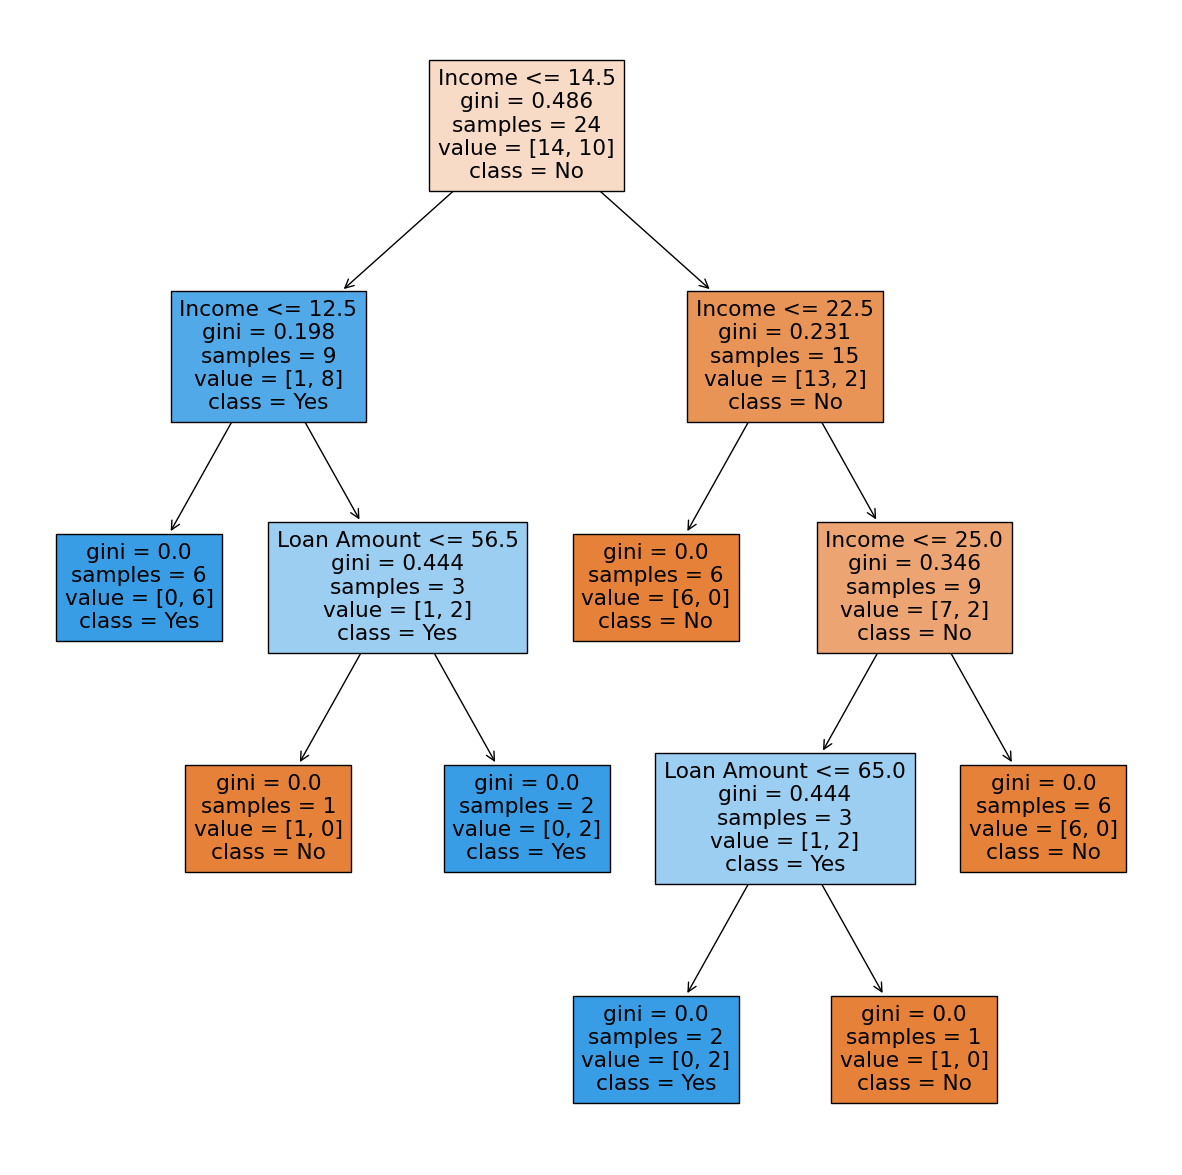

In [119]:
#import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split

# Convert X to a DataFrame
#X = pd.DataFrame(X, columns=['Income', 'Loan Amount'])

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1234)

# Fit a decision tree classifier
#model = DecisionTreeClassifier(random_state=1234)
#model.fit(X_train, y_train)

# Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True);

Benefit of decision trees:

They are pretty good at ranking the effectiveness of independent variables and predicting the values of the dependent variable. This is known as feature importance.

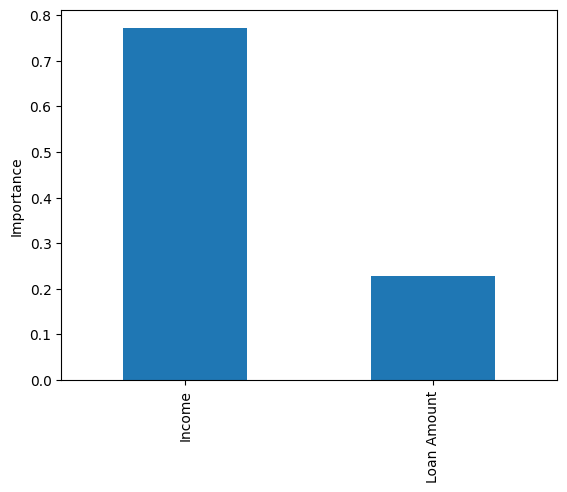

In [118]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Classification Tree

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
grid = {}

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV()
gcv.fit(X_train, y_train)

In [ ]:
model_
model_

In [ ]:
model_.score(X_train, y_train)

In [ ]:
model_.score(X_test, y_test)

In [ ]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);